<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/LS_DS_231_Logistic_Regression_DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

In [1]:
!pip install kaggle

In [2]:
# Note - you'll also have to sign up for Kaggle and authorize the API
# https://github.com/Kaggle/kaggle-api#api-credentials

# This essentially means uploading a kaggle.json file
# For Colab we can have it in Google Drive
from google.colab import drive
drive.mount('/content/drive')
%env KAGGLE_CONFIG_DIR=/content/drive/My Drive/

# You also have to join the Titanic competition to have access to the data
!kaggle competitions download -c titanic

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
env: KAGGLE_CONFIG_DIR=/content/drive/My Drive/
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 11, in <module>
    load_entry_point('kaggle==1.5.2', 'console_scripts', 'kaggle')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2793, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2411, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2417, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in

In [3]:
# How would we try to do this with linear regression?
import pandas as pd

train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()  # Unlabeled, for Kaggle submission

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
from sklearn.linear_model import LinearRegression # Importing model

X = train_df[['Pclass', 'Age', 'Fare']] # Making X variable
y = train_df.Survived # Making y variable

linear_reg = LinearRegression().fit(X, y) # Creating linreg instance and fitting the model
linear_reg.score(X, y) # Showing score

0.08389810726550917

In [0]:
# ?LinearRegression looking at score

In [7]:
linear_reg.predict(test_df[['Pclass', 'Age', 'Fare']]) # Using test dataset to make predictions

array([0.79543117, 0.58610823, 0.67595121, 0.793829  , 0.62090522,
       0.72542107, 0.59848968, 0.58734245, 0.48567063, 0.77627736,
       0.84211887, 0.57052439, 0.7754689 , 0.96621114, 0.70287941,
       0.57673837, 0.72321391, 0.75894755, 0.77968041, 0.50246003,
       0.49858077, 0.7474959 , 0.3542282 , 0.61648435, 0.71300224,
       0.66294608, 0.53175333, 0.77397395, 0.68419387, 0.68395536,
       0.52041202, 0.56814038, 0.79586606, 0.81372012, 0.61068545,
       0.57260627, 0.52525981, 0.58055388, 0.45584728, 0.67976208,
       0.8226707 , 0.84286197, 0.96189157, 0.66724612, 0.68589478,
       0.61846513, 0.63455044, 0.68275686, 0.65738372, 0.45198998,
       0.59988596, 0.63845908, 0.63132487, 0.7888473 , 0.60126246,
       0.79714045, 0.78713803, 0.54643775, 0.42823635, 0.7711724 ,
       0.53552976, 0.55608044, 0.54480459, 0.57031915, 0.65080369,
       0.77958926, 0.6371013 , 0.70993488, 0.71493598, 0.60375943,
       0.54407206, 0.48186138, 0.76576089, 0.75456305, 0.53968

In [8]:
linear_reg.coef_ # Showing coefficients of model

array([-0.08596295, -0.00829314,  0.00048775])

In [9]:
import numpy as np

test_case = np.array([[1, 5, 500]])  # Rich 5-year old in first class
linear_reg.predict(test_case) # Using a single test case for a prediction

array([1.14845883])

In [10]:
from sklearn.linear_model import LogisticRegression # Importing logreg model

log_reg = LogisticRegression().fit(X, y) # Creating instance of model and fitting it
log_reg.score(X, y) # Showing score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7103825136612022

In [11]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']]) # Using log_reg to make predicitions with test dataset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
log_reg.predict(test_case)[0] # One test case with log_reg

1

In [13]:
help(log_reg.predict)

Help on method predict in module sklearn.linear_model.base:

predict(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Predict class labels for samples in X.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape [n_samples]
        Predicted class label per sample.



In [14]:
log_reg.predict_proba(test_case)[0] # Predicting probabilities instead of classification

array([0.02485552, 0.97514448])

In [15]:
# What's the math?
log_reg.coef_ # Showing coefficients

array([[-0.0455017 , -0.02912513,  0.0048037 ]])

In [16]:
log_reg.intercept_ # Showing intercept

array([1.45878264])

In [0]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [18]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case))) # Showing same probability as above but with our sigmoid function

array([[0.97514448]])

So, clearly a more appropriate model in this situation! For more on the math, [see this Wikipedia example](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

For live - let's tackle [another classification dataset on absenteeism](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) - it has 21 classes, but remember, scikit-learn LogisticRegression automatically handles more than two classes. How? By essentially treating each label as different (1) from some base class (0).

In [19]:
# Getting data files with wget from web address
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip

--2019-02-25 23:06:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66136 (65K) [application/zip]
Saving to: ‘Absenteeism_at_work_AAA.zip.2’

Absenteeism_at_work 100%[===================>]  64.59K   177KB/s    in 0.4s    

2019-02-25 23:06:02 (177 KB/s) - ‘Absenteeism_at_work_AAA.zip.2’ saved [66136/66136]



In [20]:
# Unzipping the file
!unzip Absenteeism_at_work_AAA.zip

Archive:  Absenteeism_at_work_AAA.zip
replace Absenteeism_at_work.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Absenteeism_at_work.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Absenteeism_at_work.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Attribute Information.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UCI_ABS_TEXT.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# From Chris Luedtke

# import io, requests, zipfile

# data_url = ('http://archive.ics.uci.edu/ml/'
#             'machine-learning-databases/00445/'
#             'Absenteeism_at_work_AAA.zip')

# r = requests.get(data_url)

# write_path = 'datasets'

# with zipfile.ZipFile(io.BytesIO(r.content)) as z:
#     z.extractall(write_path)
    

In [21]:
!head Absenteeism_at_work.csv

ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours
11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;1;90;172;30;4
36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0;98;178;31;0
3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0;89;170;31;2
7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;68;168;24;4
11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;1;90;172;30;2
3;23;7;6;1;179;51;18;38;239.554;97;0;1;0;1;0;0;89;170;31;2
10;22;7;6;1;361;52;3;28;239.554;97;0;1;1;1;0;4;80;172;27;8
20;23;7;6;1;260;50;11;36;239.554;97;0;1;4;1;0;0;65;168;23;4
14;19;7;2;1;155;12;14;34;239.554;97;0;1;2;1;0;0;95;196;25;40


In [22]:
pd.set_option('display.max_columns', 50)
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [23]:
df.shape

(740, 21)

In [24]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [25]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [0]:
X = df.drop(['ID', 'Reason for absence'], axis=1) # Making indep variable

In [0]:
y = df['Reason for absence'] # Making dep variable

In [0]:
from sklearn.linear_model.logistic import LogisticRegression

In [29]:
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=10000) # Setting gradient descent params
model.fit(X,y)
model.score(X,y)

0.5121621621621621

In [30]:
# Running the above again, but this time splitting our data first
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

model2 = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=8000)
model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

0.3716216216216216

In [31]:
# Looking at the predictions with the test dataset
predictions = model2.predict(X_test)
predictions

array([27, 23, 15, 23, 27, 23, 23, 13, 22, 28,  0,  0, 23, 13,  0,  1, 23,
       23, 14, 28, 22, 23, 13,  0, 23, 28, 28, 27, 23, 13, 24, 23, 24, 28,
       23, 28, 23, 23, 13, 19, 22, 22, 22, 28, 23, 27, 26, 19, 23, 23, 27,
       18, 23, 28, 25,  0, 28,  0, 21, 19, 11, 28, 13,  7, 26, 19, 23, 28,
       27, 13, 27, 22, 13, 16, 23, 10, 23, 27, 10, 10, 28, 23, 13, 22, 22,
       27, 28, 18, 22, 10, 28,  0, 23, 28, 23, 27, 23, 10, 27, 11, 23,  7,
       14, 23, 27, 27, 22, 27,  0, 27, 26, 25, 28, 28, 13, 10, 27, 23, 14,
       19, 23, 23, 26, 28, 27, 23,  0, 23, 22, 23, 27, 23, 27, 28,  5, 18,
       26, 23, 23, 23, 23, 28, 19, 23, 27, 27, 23, 23])

In [32]:
# Something similar to value_counts to see the groupings of predictions
from collections import Counter
Counter(predictions)

Counter({0: 9,
         1: 1,
         5: 1,
         7: 2,
         10: 6,
         11: 2,
         13: 10,
         14: 3,
         15: 1,
         16: 1,
         18: 3,
         19: 6,
         21: 1,
         22: 11,
         23: 41,
         24: 2,
         25: 2,
         26: 5,
         27: 21,
         28: 20})

In [33]:
# Getting a single row to do a single test case
single_row = np.array(X_test.iloc[0])
single_row

array([  1.   ,   6.   ,   2.   , 225.   ,  26.   ,   9.   ,  28.   ,
       308.593,  95.   ,   0.   ,   1.   ,   1.   ,   0.   ,   0.   ,
         2.   ,  69.   , 169.   ,  24.   ,   1.   ])

In [34]:
model2.predict([single_row])[0] # Predictions for one test case

27

## Assignment - real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

In [35]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-02-25 23:10:08--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip.2’

fma_metadata.zip.2  100%[===================>] 341.81M  24.6MB/s    in 15s     

2019-02-25 23:10:23 (23.5 MB/s) - ‘fma_metadata.zip.2’ saved [358412441/358412441]

Archive:  fma_metadata.zip
replace fma_metadata/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fma_metadata/checksums? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fma_metadata/not_found.pickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fma_metadata/raw_genres.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fma_metadata/raw_albums.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fma_metadata/raw_artists

In [36]:
tracks = pd.read_csv('fma_metadata/tracks.csv')
tracks.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,...,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,...,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [37]:
tracks.describe()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,...,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
count,106575,106575,103046,70295,15296,106575,106575,83150,106575,18061,106575,105550,106575,100067,22712,5376,14272,71157,106575,105719,106575,106575,44545.000000,70211,44545.000000,...,106575,79257,5582,106575,106575,106575,106575,3671,106575,6160,106575,106575,49599,106575,106575,2350,106575,15025,106488,106575,312,106575,1264,106575,106574
unique,106575,29,14341,3670,623,65,14929,11076,11351,761,2389,14299,170,6,77,58,755,6085,52,15971,214,17055,1613.000000,2330,1601.000000,...,15661,6643,390,4,4,12172,28,506,86170,774,3366,329,17,4769,4152,1587,18977,45,114,15340,67,331,136,2452,94987
top,152457,0,2015-01-26 13:04:57,2008-01-01 00:00:00,Ernie Indradat,0,-1,"<p class=""p1"" style=""margin: 0px; padding: 8px...",-1,Joe Belock,[],microSong Entries,10,Album,2007-01-01 00:00:00,2016-01-01 00:00:00,HUSH Records,"<p><span style=""color: #333333; font-family: G...",0,2013-03-31 02:17:41,0,15891,40.692455,"Brooklyn, NY",-73.990364,...,[],https://soundcloud.com/konstantin-trokay,http://en.wikipedia.org/wiki/Josh_Woodward,training,large,320000,0,konstantin trokai,2009-03-05 09:45:49,2008-11-26 00:00:00,180,0,Rock,[21],[21],"<p><a href=""http://www.myspace.com/theshambler...",320,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,97,Apache Tomcat,1,Victrola Dog (ASCAP),[],Untitled
freq,1,71187,310,667,876,45753,805,310,3130,855,83549,310,6045,87549,1789,479,604,745,59914,745,15414,745,890.000000,2327,890.000000,...,3061,745,284,84353,81574,49094,88386,541,4,700,507,35944,14182,2735,2735,22,67,14255,19250,110,44,10459,465,83078,298


In [38]:
pd.set_option('display.max_columns', None)  # Unlimited columns
tracks.head()

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,artist.11,artist.12,artist.13,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [39]:
tracks.shape

(106576, 53)

In [40]:
# Removing all existing headers, replacing them with numbers
tracks.columns = range(tracks.shape[1])
tracks.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [41]:
# Turning the first row into the column headers
tracks = tracks.rename(columns=tracks.iloc[0])
tracks.head()

,nan,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World


In [42]:
# Dropping first and second rows
tracks = tracks.drop([0, 1])
tracks.head()

,nan,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [0]:
# Dropping first column -- can't get 'nan' to drop for some reason, moving on
# tracks = tracks.drop(columns=nan)
# tracks.head()

In [44]:
tracks.head()

,nan,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [45]:
tracks.isnull().sum()

NaN                       0
comments                  0
date_created           3529
date_released         36280
engineer              91279
favorites                 0
id                        0
information           23425
listens                   0
producer              88514
tags                      0
title                  1025
tracks                    0
type                   6508
active_year_begin     83863
active_year_end      101199
associated_labels     92303
bio                   35418
comments                  0
date_created            856
favorites                 0
id                        0
latitude              62030
location              36364
longitude             62030
members               59725
name                      0
related_projects      93422
tags                      0
website               27318
wikipedia_page       100993
split                     0
subset                    0
bit_rate                  0
comments                  0
composer            

In [47]:
# Dropping duplicate columns -- code found here: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

tracks = tracks.loc[:,~tracks.columns.duplicated()]
tracks.head()

,nan,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,latitude,location,longitude,members,name,related_projects,website,wikipedia_page,split,subset,bit_rate,composer,date_recorded,duration,genre_top,genres,genres_all,interest,language_code,license,lyricist,number,publisher
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,NaN,2008-11-26 00:00:00,168,Hip-Hop,[21],[21],4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,3,NaN
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,NaN,2008-11-26 00:00:00,237,Hip-Hop,[21],[21],1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,4,NaN
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,NaN,2008-11-26 00:00:00,206,Hip-Hop,[21],[21],1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,NaN,6,NaN
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,http://kurtvile.com,NaN,training,small,192000,Kurt Vile,2008-11-26 00:00:00,161,Pop,[10],[10],54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,NaN,1,NaN
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,NaN,NaN,training,large,256000,NaN,2008-01-01 00:00:00,311,NaN,"[76, 103]","[17, 10, 76, 103]",978,en,Attribution-NonCommercial-NoDerivatives (aka M...,NaN,3,NaN


In [48]:
tracks.isnull().sum()

NaN                       0
comments                  0
date_created           3529
date_released         36280
engineer              91279
favorites                 0
id                        0
information           23425
listens                   0
producer              88514
tags                      0
title                  1025
tracks                    0
type                   6508
active_year_begin     83863
active_year_end      101199
associated_labels     92303
bio                   35418
latitude              62030
location              36364
longitude             62030
members               59725
name                      0
related_projects      93422
website               27318
wikipedia_page       100993
split                     0
subset                    0
bit_rate                  0
composer             102904
date_recorded        100415
duration                  0
genre_top             56976
genres                    0
genres_all                0
interest            

In [49]:
tracks.dtypes

NaN                  object
comments             object
date_created         object
date_released        object
engineer             object
favorites            object
id                   object
information          object
listens              object
producer             object
tags                 object
title                object
tracks               object
type                 object
active_year_begin    object
active_year_end      object
associated_labels    object
bio                  object
latitude             object
location             object
longitude            object
members              object
name                 object
related_projects     object
website              object
wikipedia_page       object
split                object
subset               object
bit_rate             object
composer             object
date_recorded        object
duration             object
genre_top            object
genres               object
genres_all           object
interest            

In [49]:
tracks['favorites'].value_counts()

0     45753
1     20361
2      8373
0      7926
3      4208
1      3396
-1     3130
4      2005
2      1976
5      1445
6      1183
3      1158
8       797
7       791
4       537
-1      399
10      383
11      337
5       262
9       231
12      203
14      159
7       151
6       147
8       101
12       94
13       87
19       71
25       69
17       66
      ...  
15       41
10       39
55       38
18       37
11       36
20       28
29       26
18       21
28       20
21       20
23       19
39       18
22       17
24       16
40       15
24       15
26       15
47       14
22       12
27       12
13       12
16       12
38       10
61       10
60        9
33        9
43        7
54        7
37        6
36        5
Name: favorites, Length: 64, dtype: int64

In [0]:
# Changing dtypes for numerical columns
tracks['favorites'] = tracks['favorites'].astype(dtype='int32')
tracks['id'] = tracks['id'].astype(dtype='int32')
tracks['listens'] = tracks['listens'].astype(dtype='int32')
tracks['tracks'] = tracks['tracks'].astype(dtype='int32')
tracks['bit_rate'] = tracks['bit_rate'].astype(dtype='int32')
tracks['duration'] = tracks['duration'].astype(dtype='int32')
tracks['interest'] = tracks['interest'].astype(dtype='int32')
tracks['number'] = tracks['number'].astype(dtype='int32')

In [51]:
# Making subset with only column I want to use in log_reg
subset = tracks[['favorites', 'id', 'listens', 'tracks', 'bit_rate', 'duration', 'interest', 'number', 'genre_top']]
subset.head()

,favorites,id,listens,tracks,bit_rate,duration,interest,number,genre_top
2,4,1,6073,7,256000,168,4656,3,Hip-Hop
3,4,1,6073,7,256000,237,1470,4,Hip-Hop
4,4,1,6073,7,256000,206,1933,6,Hip-Hop
5,4,6,47632,2,192000,161,54881,1,Pop
6,2,4,2710,13,256000,311,978,3,NaN


In [52]:
subset.shape

(106574, 9)

In [53]:
subset = subset.dropna(how='any')
subset.head()

,favorites,id,listens,tracks,bit_rate,duration,interest,number,genre_top
2,4,1,6073,7,256000,168,4656,3,Hip-Hop
3,4,1,6073,7,256000,237,1470,4,Hip-Hop
4,4,1,6073,7,256000,206,1933,6,Hip-Hop
5,4,6,47632,2,192000,161,54881,1,Pop
11,4,1,6073,7,256000,207,1126,5,Hip-Hop


In [54]:
subset.shape

(49598, 9)

In [55]:
subset.isnull().sum()

favorites    0
id           0
listens      0
tracks       0
bit_rate     0
duration     0
interest     0
number       0
genre_top    0
dtype: int64

In [56]:
# Encoding genre_top column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(subset['genre_top'])
print(le.classes_)
subset['genre_top'] = pd.Series(le.transform(subset['genre_top']))

['Blues' 'Classical' 'Country' 'Easy Listening' 'Electronic'
 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental' 'International' 'Jazz'
 'Old-Time / Historic' 'Pop' 'Rock' 'Soul-RnB' 'Spoken']


In [57]:
subset.head(10)

,favorites,id,listens,tracks,bit_rate,duration,interest,number,genre_top
2,4,1,6073,7,256000,168,4656,3,7.0
3,4,1,6073,7,256000,237,1470,4,12.0
4,4,1,6073,7,256000,206,1933,6,7.0
5,4,6,47632,2,192000,161,54881,1,13.0
11,4,1,6073,7,256000,207,1126,5,6.0
12,0,58,3331,4,256000,837,2484,0,6.0
13,0,58,3331,4,256000,509,1948,0,10.0
14,2,59,1681,2,256000,1233,2559,1,10.0
15,2,59,1681,2,256000,1231,1909,2,10.0
16,1,60,1304,2,128000,296,702,2,10.0


In [58]:
subset = subset.dropna(how='any') # !!! For some reason NaNs pop back up!!!
subset.head()

,favorites,id,listens,tracks,bit_rate,duration,interest,number,genre_top
2,4,1,6073,7,256000,168,4656,3,7.0
3,4,1,6073,7,256000,237,1470,4,12.0
4,4,1,6073,7,256000,206,1933,6,7.0
5,4,6,47632,2,192000,161,54881,1,13.0
11,4,1,6073,7,256000,207,1126,5,6.0


In [59]:
subset.isnull().sum()

favorites    0
id           0
listens      0
tracks       0
bit_rate     0
duration     0
interest     0
number       0
genre_top    0
dtype: int64

In [0]:
#subset = (subset - subset.mean()) / subset.std()

In [60]:
subset.columns

Index(['favorites', 'id', 'listens', 'tracks', 'bit_rate', 'duration',
       'interest', 'number', 'genre_top'],
      dtype='object')

In [0]:
# Making indep and dep variables

X = subset[['favorites', 'id', 'listens', 'tracks', 'bit_rate', 'duration',
       'interest', 'number']]

y = subset['genre_top']

In [62]:
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X, y)
model.score(X, y)

0.29412427680516945

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model2 = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=5000)
model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

0.2906304004808776

In [64]:
predictions = model2.predict(X_test)
print(predictions)

[13. 13. 13. ... 13. 13. 13.]


In [65]:
from collections import Counter
Counter(predictions)

Counter({1.0: 1,
         4.0: 1,
         5.0: 1237,
         7.0: 39,
         8.0: 70,
         9.0: 26,
         10.0: 1,
         13.0: 11934})

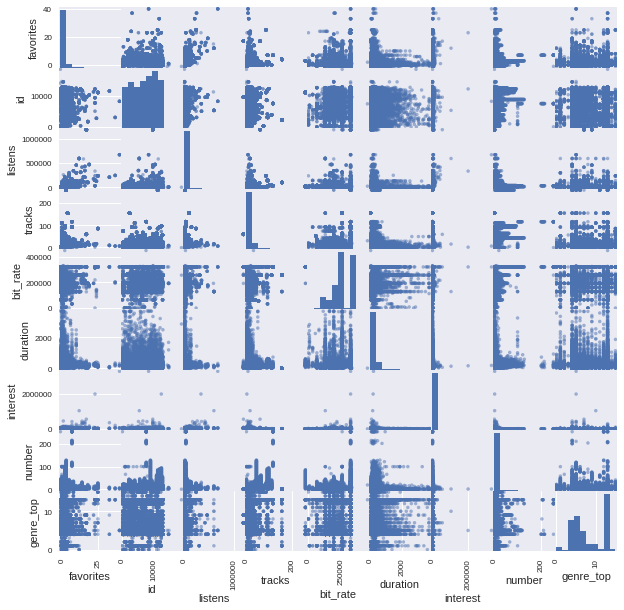

In [67]:
from pandas.plotting import scatter_matrix

scatter_matrix(subset, figsize=(10,10));

In [69]:
subset.columns

Index(['favorites', 'id', 'listens', 'tracks', 'bit_rate', 'duration',
       'interest', 'number', 'genre_top'],
      dtype='object')

In [0]:
# Dropped 'id' to see if we get better predictions
X = subset[['favorites', 'listens', 'tracks', 'bit_rate', 'duration',
       'interest', 'number']]

y = subset['genre_top']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model2 = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=5000)
model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

# Score went up slightly

0.29836952438199715

In [0]:
# interaction -- higher number of tracks will have higher duration

subset['tracks_dur_inter'] = subset['tracks'] * subset['duration']

In [0]:
# Adding new feature to see if we get better predictions
X = subset[['favorites', 'listens', 'tracks', 'bit_rate', 'duration',
       'interest', 'number', 'tracks_dur_inter']]

y = subset['genre_top']

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model2 = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=10000)
model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

# Score went down slightly

0.29829438725674357

In [77]:
subset.corr()

,favorites,id,listens,tracks,bit_rate,duration,interest,number,genre_top,tracks_dur_inter
favorites,1.000000,0.043898,0.576173,0.190848,0.024521,-0.035048,0.223075,0.106090,0.004742,0.117992
id,0.043898,1.000000,0.067826,0.054328,0.209554,-0.002086,0.023083,0.085376,-0.085576,0.102208
listens,0.576173,0.067826,1.000000,0.184281,-0.002685,-0.047726,0.239883,0.005464,-0.005470,0.071950
tracks,0.190848,0.054328,0.184281,1.000000,0.050561,-0.105801,-0.010980,0.410938,0.001077,0.662843
bit_rate,0.024521,0.209554,-0.002685,0.050561,1.000000,-0.002479,0.004186,0.084092,-0.009380,0.068308
duration,-0.035048,-0.002086,-0.047726,-0.105801,-0.002479,1.000000,-0.006543,-0.038807,-0.007537,0.275945
interest,0.223075,0.023083,0.239883,-0.010980,0.004186,-0.006543,1.000000,-0.017115,-0.007437,-0.010540
number,0.106090,0.085376,0.005464,0.410938,0.084092,-0.038807,-0.017115,1.000000,-0.008853,0.355801
genre_top,0.004742,-0.085576,-0.005470,0.001077,-0.009380,-0.007537,-0.007437,-0.008853,1.000000,-0.007041
tracks_dur_inter,0.117992,0.102208,0.071950,0.662843,0.068308,0.275945,-0.010540,0.355801,-0.007041,1.000000


This is the biggest data you've played with so far, and while it does generally fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  
  **It's hard to say with certainty. The best predictors may not be in this dataset. As you can see from the correlation matrix above, the X variables I chose for the model were not strongly related to y (genre_top). I think a decent predictor would be the listener's music prefrences. What have they listened to most in the past?**
  
  - What information isn't very useful for predicting genre?
  
  **There was a ton of information in the dataset that wasn't useful for predicting genre. For example, I dropped the 'id' column and got a better score. Many other columns didn't have enough data (i.e. too many NaNs) to be useful. Columns like 'members' and 'license' weren't useful either. At least with my current knowledge.**
  
  - What surprised you the most about your results?
  
  **I'm not sure that it was a huge surprise, but my results were not very good. I don't think I included enough good features from the dataset. And/or I didn't do the correct feature engineering. I was surprised to see others get much higher accuracy scores.**

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.